<a href="https://www.kaggle.com/code/omaraboelnaga/heat-disease-prediction?scriptVersionId=191089979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.duplicated().sum()

0

#### No duplicates were found

In [6]:
numeric_columns = df[['Age',"RestingBP",'Cholesterol',"MaxHR"]]
data = df
for col in numeric_columns.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    outlier = ((numeric_columns[col] > high) | (numeric_columns[col] < low)).sum()
    total_outliers = numeric_columns[col].shape[0]
    print(f"Total Outliars in {col} are : {outlier} : {round(100*(outlier)/total_outliers,2)}%")
    if outlier>0:
        data=data[(data[col] >= low) &(data[col] <= high)]

Total Outliars in Age are : 0 : 0.0%
Total Outliars in RestingBP are : 28 : 3.05%
Total Outliars in Cholesterol are : 183 : 19.93%
Total Outliars in MaxHR are : 2 : 0.22%


In [7]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: xlabel='RestingBP', ylabel='Count'>

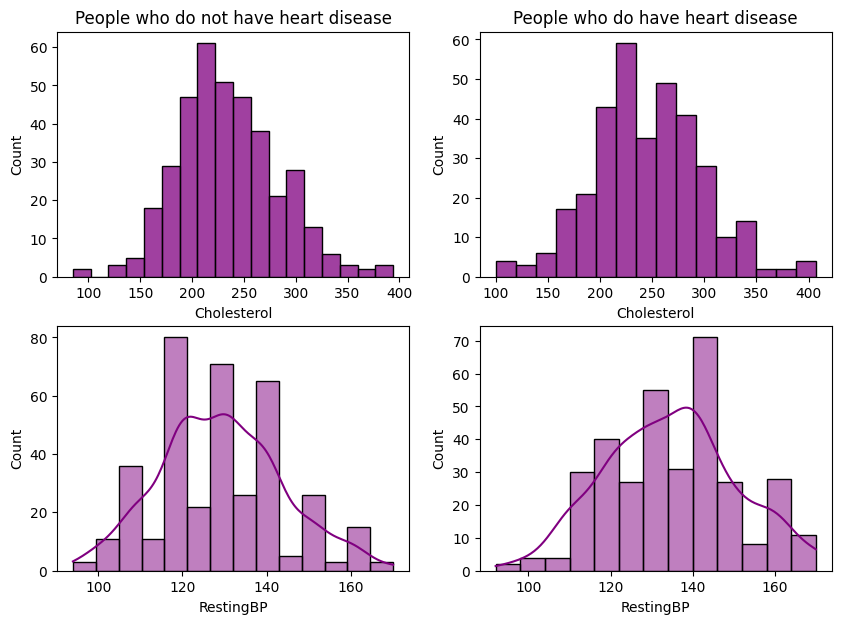

In [8]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(data[data.HeartDisease ==0].Cholesterol,ax = axs[0,0],color = 'purple')
axs[0,0].set_title("People who do not have heart disease")
sns.histplot(data[data.HeartDisease ==1].Cholesterol,ax = axs[0,1],color = 'purple')
axs[0,1].set_title("People who do have heart disease")
sns.histplot(data[data.HeartDisease ==0].RestingBP,ax = axs[1,0],kde = True,color = 'purple')
sns.histplot(data[data.HeartDisease ==1].RestingBP,ax = axs[1,1],kde = True,color = 'purple')

<Axes: xlabel='MaxHR', ylabel='Count'>

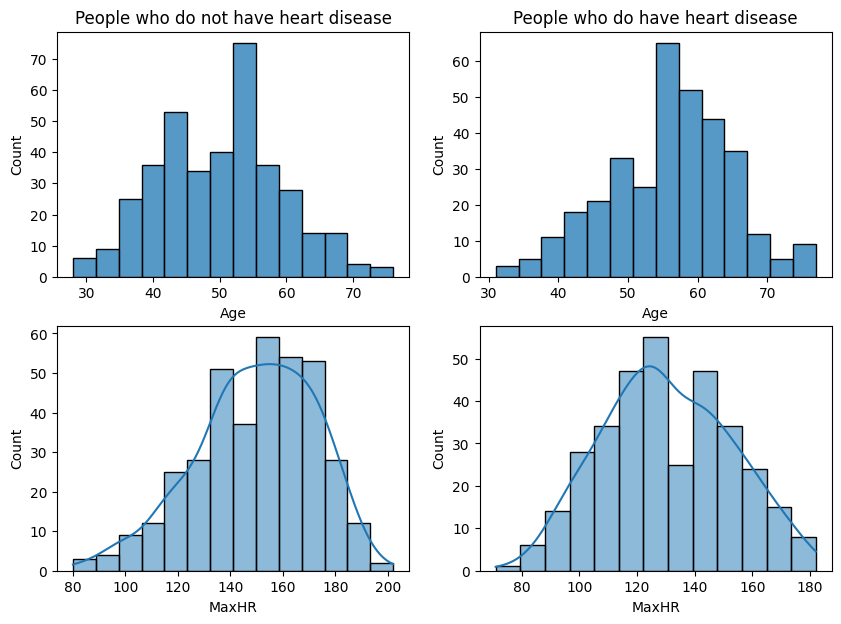

In [9]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(data[data.HeartDisease ==0].Age,ax = axs[0,0])
axs[0,0].set_title("People who do not have heart disease")
sns.histplot(data[data.HeartDisease ==1].Age,ax = axs[0,1])
axs[0,1].set_title("People who do have heart disease")
sns.histplot(data[data.HeartDisease ==0].MaxHR,ax = axs[1,0],kde = True)
sns.histplot(data[data.HeartDisease ==1].MaxHR,ax = axs[1,1],kde = True)

Text(0.5, 1.0, 'ChestPainType')

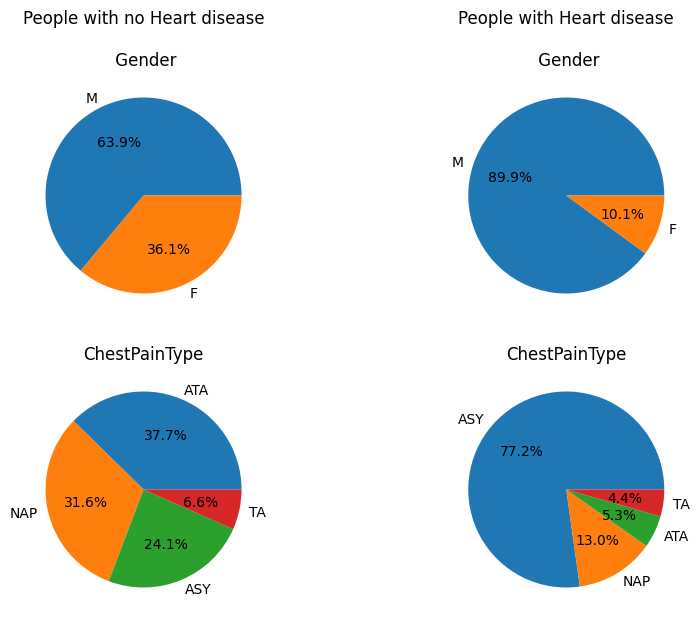

In [10]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
axs[0, 0].pie( data[data.HeartDisease == 0]['Sex'].value_counts(), labels= data[data.HeartDisease == 0]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['Sex'].value_counts(), labels= data[data.HeartDisease == 1]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n Gender")
axs[0,1].set_title("People with Heart disease\n\n Gender")
axs[1, 0].pie( data[data.HeartDisease == 0]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 0]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1, 1].pie( data[data.HeartDisease == 1]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 1]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ChestPainType")
axs[1,1].set_title("ChestPainType")

Text(0.5, 1.0, 'FastingBS')

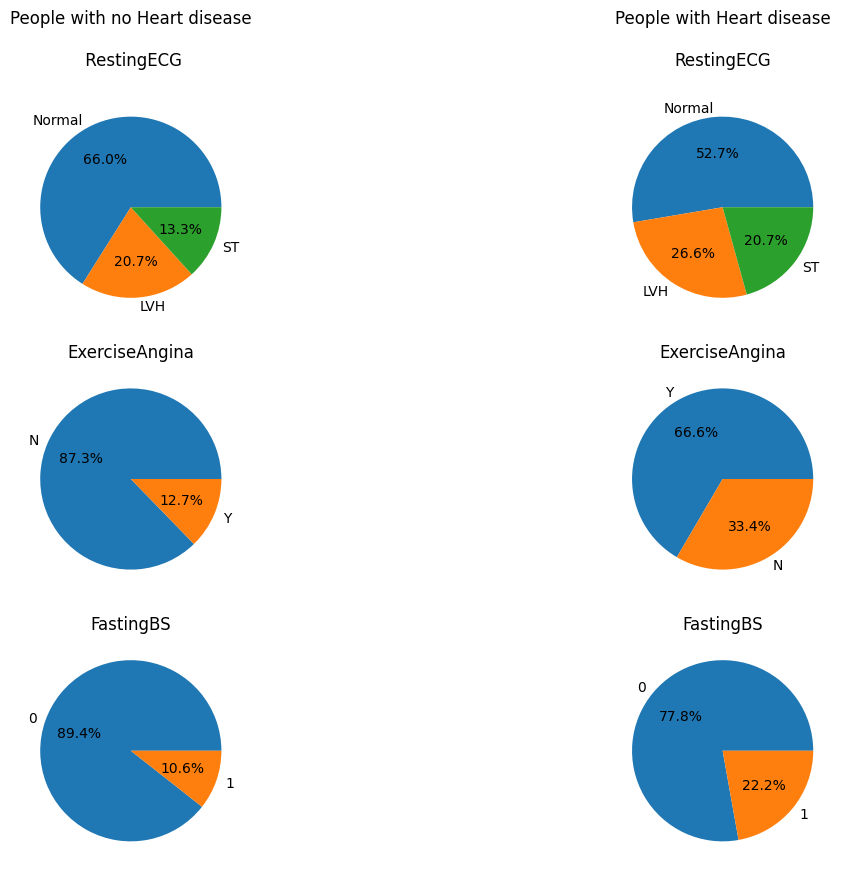

In [11]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( data[data.HeartDisease == 0]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( data[data.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( data[data.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( data[data.HeartDisease == 0]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( data[data.HeartDisease == 1]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")

Text(0.5, 0, 'slope of fasting exercise')

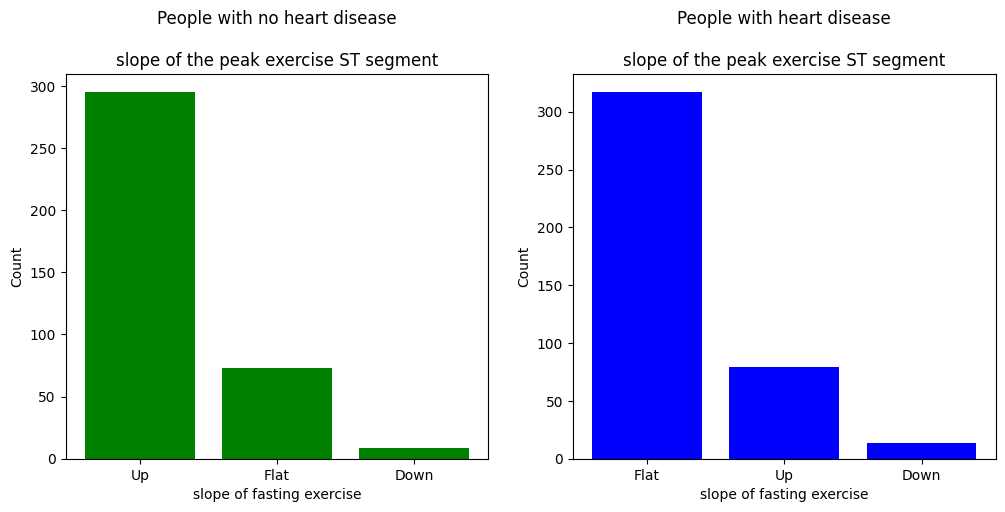

In [12]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
fasting_bs_counts = data[data["HeartDisease"] == 0]['ST_Slope'].value_counts()
axs[0].bar(fasting_bs_counts.index, fasting_bs_counts.values,color = 'green')
axs[0].set_xlabel('slope of fasting exercise')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
axs[0].set_title('People with no heart disease\n\nslope of the peak exercise ST segment')
axs[1].bar(df[df["HeartDisease"] == 1]['ST_Slope'].value_counts().index, df[df["HeartDisease"] == 0]['ST_Slope'].value_counts().values,color = 'blue')
axs[1].set_title('People with heart disease\n\nslope of the peak exercise ST segment')
axs[1].set_xlabel('slope of fasting exercise')

In [13]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
cols=  ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in cols:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [15]:
x = data.drop("HeartDisease", axis=  1)
y = data.HeartDisease

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=  0.80,random_state= 42)

In [17]:
cols= ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for i in cols:
    sc = StandardScaler()
    x_train[i] = sc.fit_transform(x_train[i].values.reshape(-1,1))
    x_test[i]=sc.transform(x_test[i].values.reshape(-1,1))

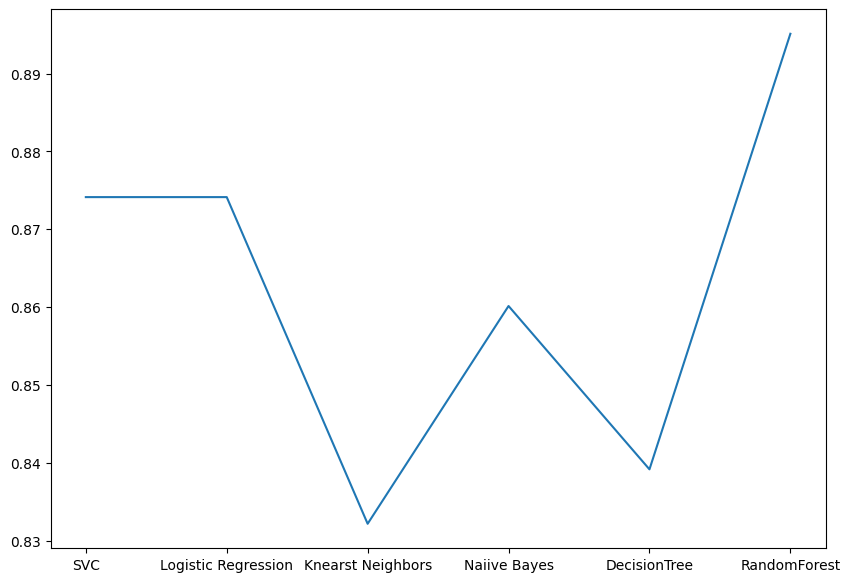

In [18]:
models=[
    SVC(kernel="rbf", C=1, gamma= 0.1),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    DecisionTreeClassifier(random_state = 42,criterion="entropy"),
    RandomForestClassifier(n_estimators=200,random_state = 42,)
]
model_names = ['SVC', "Logistic Regression","Knearst Neighbors", "Naiive Bayes", "DecisionTree", "RandomForest"]
accuracies=[]
conf = []
for i in models:
    model = i
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test,y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    conf.append(cf_matrix)
plt.figure(figsize = (10,7))
plt.plot(model_names, accuracies)

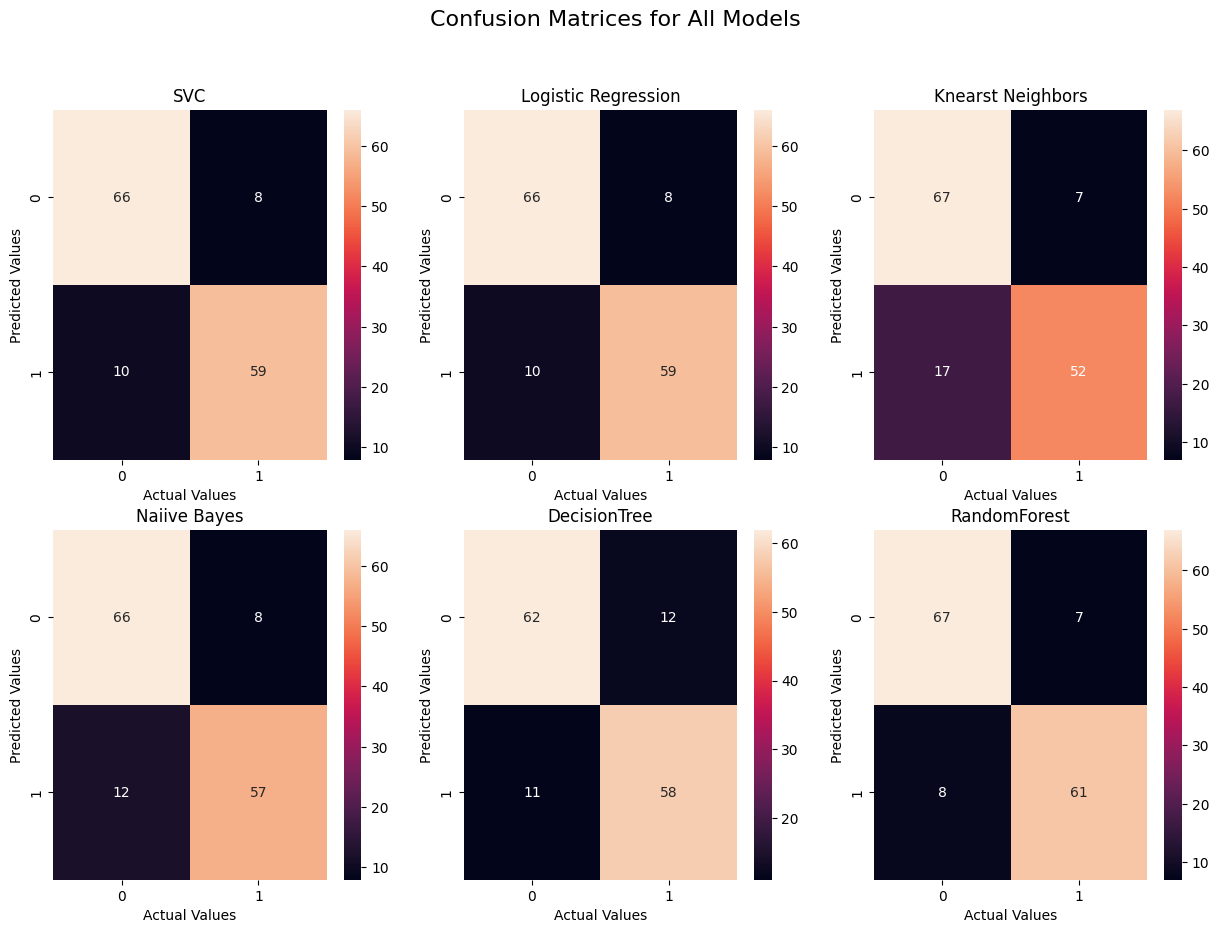

In [19]:
c = 0
fig , axs = plt.subplots(2,3,figsize= (15,10))
fig.suptitle("Confusion Matrices for All Models", fontsize=16)
for i in range(2):
    for x in range(3):
        sns.heatmap(conf[c],ax= axs[i,x],annot= True)
        axs[i,x].set_title(model_names[c])
        axs[i,x].set_xlabel("Actual Values\n")
        axs[i,x].set_ylabel("Predicted Values")
        c+=1